# 01. Importing Libraries

In [45]:
# Import Libraries

import pandas as pd
import numpy as np
import os
import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns
import scipy

# 02. Importing Data

In [1]:
# Project folder

path = r'D:\Data Analysis of Rental Prices in Berlin Using Python and Tableau'

In [2]:
path

'D:\\The Berlin Rental Market – An Analysis of Rental Prices in Berlin'

In [48]:
# Importing cleaned dataset

df_berlin = pd.read_csv(os.path.join(path, 'Data', 'Prepared Data', 'AirBnB Berlin_clean.csv'))


In [49]:
# Checking dataset using headers
df_berlin.head(10)

,Unnamed: 0,id,host_id,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
0,0,4.021868e+07,39450649,Pankow,Buch,52.631360,13.518790,Entire home/apt,51,1,11,0.40,21,345,8
1,1,3.784921e+07,286623313,Tempelhof - Schöneberg,Lichtenrade,52.372720,13.416070,Entire home/apt,40,28,2,0.07,1,352,0
2,2,4.021881e+07,39450649,Pankow,Buch,52.631360,13.518790,Entire home/apt,87,1,3,0.16,21,304,2
3,3,3.243150e+07,243598169,Spandau,Falkenhagener Feld,52.557200,13.142050,Entire home/apt,55,3,16,0.43,1,215,5
4,4,5.468740e+17,156670608,Spandau,Gatow / Kladow,52.454720,13.108900,Entire home/apt,90,3,4,2.55,1,251,4
5,5,4.021768e+07,39450649,Pankow,Buch,52.631360,13.518790,Entire home/apt,87,1,2,0.25,21,354,2
6,6,2.182378e+07,39450649,Pankow,Buch,52.631500,13.518870,Entire home/apt,75,1,5,0.10,21,356,1
7,7,4.983223e+07,39450649,Pankow,Buch,52.631359,13.518578,Entire home/apt,116,1,1,0.14,21,354,1
8,8,7.805727e+06,12996513,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.456680,13.702620,Entire home/apt,89,2,57,0.80,5,111,3
9,9,2.056482e+07,67697339,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.469960,13.684170,Entire home/apt,70,3,31,0.56,1,78,0


In [50]:
# Checking if most up-to-date version of matplotlib installed
matplotlib.__version__

'3.4.3'

In [51]:
%matplotlib inline

# 03. Data Cleaning

In [52]:
df_berlin.shape

(16962, 15)

In [53]:
df_berlin.columns

Index(['Unnamed: 0', 'id', 'host_id', 'neighbourhood_group', 'neighbourhood',
       'latitude', 'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month',
       'calculated_host_listings_count', 'availability_365',
       'number_of_reviews_ltm'],
      dtype='object')

In [54]:
# Rename columns to bring in line with US-spelling as well as shorterning of names 

df_berlin.rename(columns = {'neighbourhood_group' : 'neighborhood_group', 'neighbourhood' : 'neighborhood', 
                            'calculated_host_listings_count' : 'host_listings_count', 'number_of_reviews_ltm':'num_reviews_ltm'}, 
                             inplace = True)

In [55]:
df_berlin.dtypes

Unnamed: 0               int64
id                     float64
host_id                  int64
neighborhood_group      object
neighborhood            object
latitude               float64
longitude              float64
room_type               object
price                    int64
minimum_nights           int64
number_of_reviews        int64
reviews_per_month      float64
host_listings_count      int64
availability_365         int64
num_reviews_ltm          int64
dtype: object

In [56]:
df_berlin.head(10)

,Unnamed: 0,id,host_id,neighborhood_group,neighborhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,availability_365,num_reviews_ltm
0,0,4.021868e+07,39450649,Pankow,Buch,52.631360,13.518790,Entire home/apt,51,1,11,0.40,21,345,8
1,1,3.784921e+07,286623313,Tempelhof - Schöneberg,Lichtenrade,52.372720,13.416070,Entire home/apt,40,28,2,0.07,1,352,0
2,2,4.021881e+07,39450649,Pankow,Buch,52.631360,13.518790,Entire home/apt,87,1,3,0.16,21,304,2
3,3,3.243150e+07,243598169,Spandau,Falkenhagener Feld,52.557200,13.142050,Entire home/apt,55,3,16,0.43,1,215,5
4,4,5.468740e+17,156670608,Spandau,Gatow / Kladow,52.454720,13.108900,Entire home/apt,90,3,4,2.55,1,251,4
5,5,4.021768e+07,39450649,Pankow,Buch,52.631360,13.518790,Entire home/apt,87,1,2,0.25,21,354,2
6,6,2.182378e+07,39450649,Pankow,Buch,52.631500,13.518870,Entire home/apt,75,1,5,0.10,21,356,1
7,7,4.983223e+07,39450649,Pankow,Buch,52.631359,13.518578,Entire home/apt,116,1,1,0.14,21,354,1
8,8,7.805727e+06,12996513,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.456680,13.702620,Entire home/apt,89,2,57,0.80,5,111,3
9,9,2.056482e+07,67697339,Treptow - Köpenick,Rahnsdorf/Hessenwinkel,52.469960,13.684170,Entire home/apt,70,3,31,0.56,1,78,0


In [57]:
# Check for missing values

df_berlin.isnull().sum() # No missing values!

Unnamed: 0             0
id                     0
host_id                0
neighborhood_group     0
neighborhood           0
latitude               0
longitude              0
room_type              0
price                  0
minimum_nights         0
number_of_reviews      0
reviews_per_month      0
host_listings_count    0
availability_365       0
num_reviews_ltm        0
dtype: int64

In [58]:
#Removing 'Unnamed' variable. It's not clear to me where this is actually coming from after loading in the dataset? 

df = df_berlin.drop("Unnamed: 0",axis=1)

In [59]:
df.dtypes

id                     float64
host_id                  int64
neighborhood_group      object
neighborhood            object
latitude               float64
longitude              float64
room_type               object
price                    int64
minimum_nights           int64
number_of_reviews        int64
reviews_per_month      float64
host_listings_count      int64
availability_365         int64
num_reviews_ltm          int64
dtype: object

In [60]:
df = df[df.price < 200] # To get around the long tail outliers which otherwise significantly skew the data. 

# 04. Exploring Relationships 

In [61]:
df.shape

(16265, 14)

In [62]:
# Creating a subset without 'id' and 'host_id' (Not sure if latitude/longitude are considered index variables?)

sub = df[['neighborhood', 'neighborhood_group', 'latitude', 'longitude', 'room_type', 'price', 'minimum_nights', 
            'number_of_reviews', 'reviews_per_month', 'host_listings_count', 'availability_365', 'num_reviews_ltm']]

In [63]:
sub

,neighborhood,neighborhood_group,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,availability_365,num_reviews_ltm
0,Buch,Pankow,52.631360,13.518790,Entire home/apt,51,1,11,0.40,21,345,8
1,Lichtenrade,Tempelhof - Schöneberg,52.372720,13.416070,Entire home/apt,40,28,2,0.07,1,352,0
2,Buch,Pankow,52.631360,13.518790,Entire home/apt,87,1,3,0.16,21,304,2
3,Falkenhagener Feld,Spandau,52.557200,13.142050,Entire home/apt,55,3,16,0.43,1,215,5
4,Gatow / Kladow,Spandau,52.454720,13.108900,Entire home/apt,90,3,4,2.55,1,251,4
...,...,...,...,...,...,...,...,...,...,...,...,...
16957,Schmöckwitz/Karolinenhof/Rauchfangswerder,Treptow - Köpenick,52.371320,13.641850,Entire home/apt,60,4,34,1.40,1,128,19
16958,Altglienicke,Treptow - Köpenick,52.395080,13.529790,Entire home/apt,95,3,6,0.32,1,320,2
16959,Buch,Pankow,52.631360,13.518790,Entire home/apt,38,1,5,0.57,21,348,5
16960,Drakestr.,Steglitz - Zehlendorf,52.410323,13.291741,Entire home/apt,116,2,0,0.00,8,39,0


In [64]:
sub.corr()

,latitude,longitude,price,minimum_nights,number_of_reviews,reviews_per_month,host_listings_count,availability_365,num_reviews_ltm
latitude,1.000000,-0.134890,0.039428,0.011074,0.030600,0.018143,0.042771,-0.002859,0.015814
longitude,-0.134890,1.000000,-0.025162,-0.057836,-0.023544,-0.014786,-0.030869,-0.064965,-0.008847
price,0.039428,-0.025162,1.000000,-0.017695,0.100517,0.120455,0.190843,0.315604,0.114363
minimum_nights,0.011074,-0.057836,-0.017695,1.000000,-0.031677,-0.051172,0.041337,0.175020,-0.047035
number_of_reviews,0.030600,-0.023544,0.100517,-0.031677,1.000000,0.676898,0.054314,0.216794,0.597059
reviews_per_month,0.018143,-0.014786,0.120455,-0.051172,0.676898,1.000000,0.077024,0.234322,0.899188
host_listings_count,0.042771,-0.030869,0.190843,0.041337,0.054314,0.077024,1.000000,0.350949,0.071962
availability_365,-0.002859,-0.064965,0.315604,0.175020,0.216794,0.234322,0.350949,1.000000,0.218657
num_reviews_ltm,0.015814,-0.008847,0.114363,-0.047035,0.597059,0.899188,0.071962,0.218657,1.000000


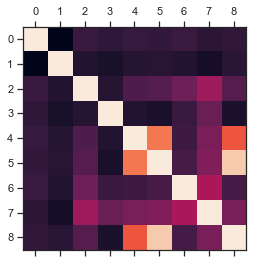

In [65]:
# Create a correlation heatmap using matplotlib

plt.matshow(sub.corr())
plt.show()

Text(0.5, 1.0, 'Correlation Matrix')

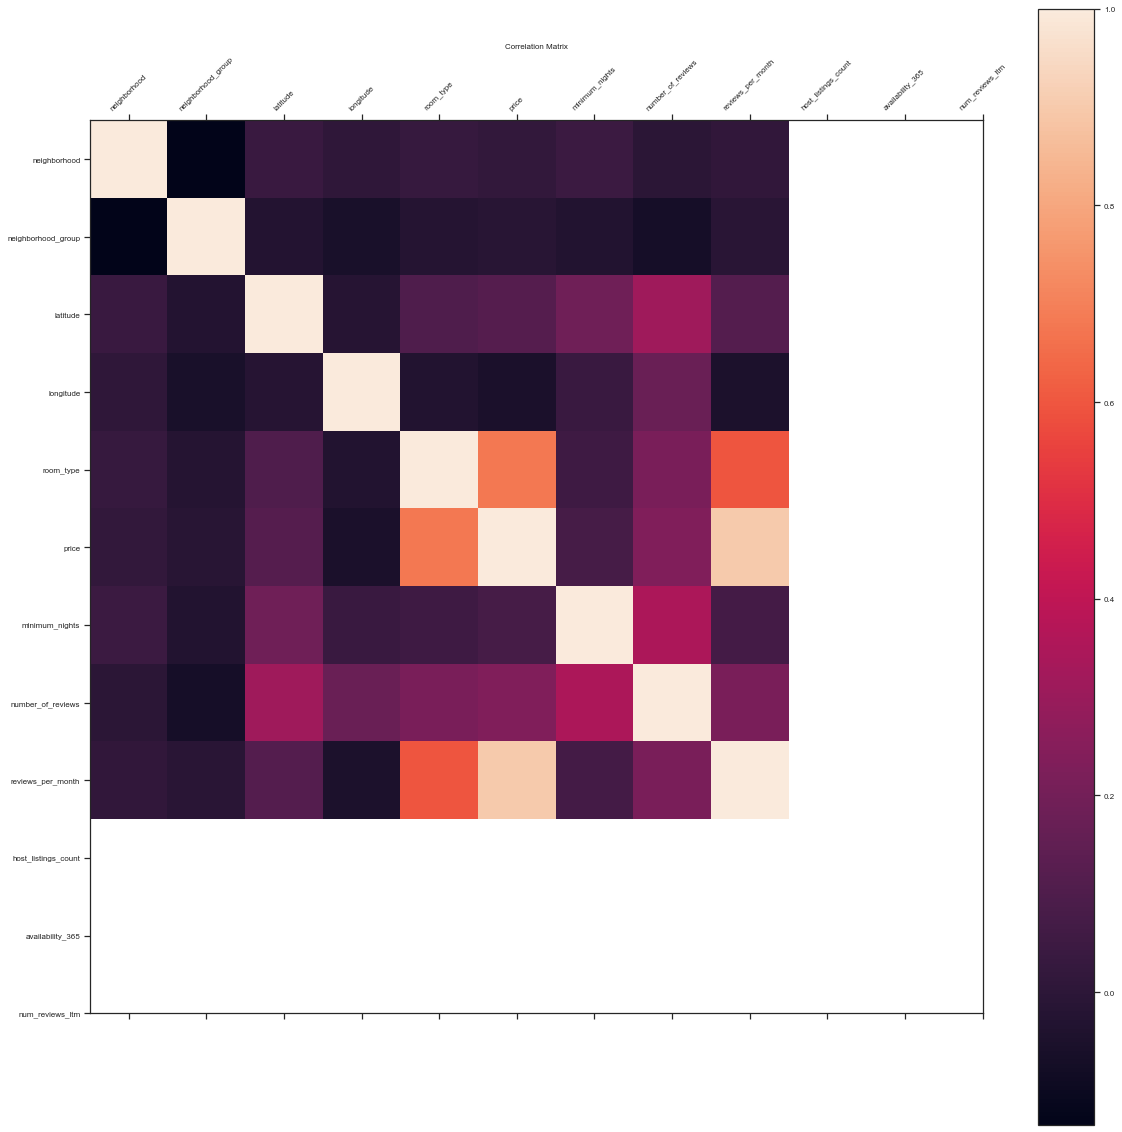

In [66]:
# Adding labels, legend, and increase size of heatmap

f = plt.figure(figsize=(20, 20)) # figure size 
plt.matshow(sub.corr(), fignum=f.number) # type of plot
plt.xticks(range(sub.shape[1]), sub.columns, fontsize=8, rotation=45) # x axis labels
plt.yticks(range(sub.shape[1]), sub.columns, fontsize=8) # y axis labels
cb = plt.colorbar() # add a colour legend (called colorbar)
cb.ax.tick_params(labelsize=8) # add font size
plt.title('Correlation Matrix', fontsize=8) # add title

##### I looked around a bit on stackoverflow and reddit forums and it's not clear to me why there is an empty space in my correlation mapping

## Correlation Heatmap

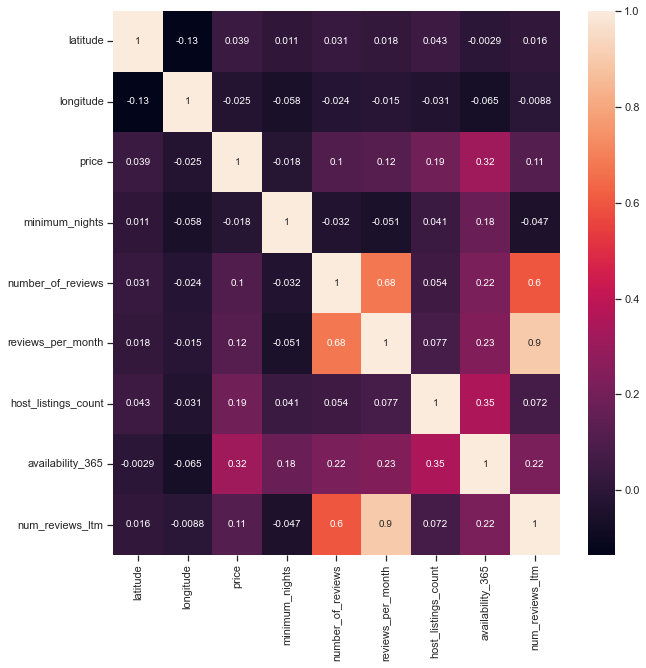

In [67]:
# Create a subplot with matplotlib
f,ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
corr = sns.heatmap(sub.corr(), annot = True, ax = ax) # The `annot` argument allows the plot to 
#place the correlation coefficients onto the heatmap.

Based on the above, I am interested in seeing what variables impact the price of a rental. While the correlations are not very strong, we see that price is most likely correlated based upon "availability_365" (0.32), "host_listings_count" (0.19), and the "reviews_per_month" (0.12).

Overall, many of the variables have fairly low correlation with one another based on the above table. However, as expected, the number_of_reviews as well as the reviews_per_month are highly correlated with another, which makes obvious sense as they are dependent upon each other. 

One thing that may be worth noting is that there is negative correlation between price and longitude/latitude as well as minimum_nights. If I'm not mistaken, a negative correlation may imply that as one variable increases, the other would decrease. Based on these results one could infer that as the price increases, the minimum_nights someone stays in an AirBnB would decrease. 

## Scatterplots

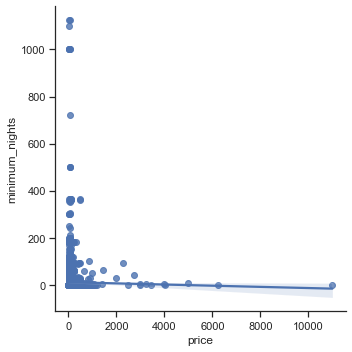

In [68]:
# Creating a scatterplot for price and minimum_nights to determineif there is a negative relationship between the variables 

sns.lmplot(x= 'price', y = 'minimum_nights', data = df_berlin)

In [69]:
# The above graph shows that the price and minimum_nights variables have a negative relationship.
## In theory, as one increases, the other will decrease, i.e. as price increases, the number of minimum_nights should decrease.

Based on the above graph, we also notice that there are significant outliers for both variables. 

Within the Berlin AirBnB dataframe there are some interesting outliers where the max number of minimum_nights is 1,124 with a maximum price of over 10,000 per night. This means that there is at least one listing that requires the AirBnB customer to rent out an apartment for a minimum of 3 years. While this could in theory be a typo, it is also very possible that someone in Berlin is also renting is for that long of a period while away for some time or using the last several years of their lease to benefit and rent it out via AirBnB while having found another place. Berlin's rental market is very excessive and out of this world! Moreover, having a place that costs over 10,000 a night means either it is a typo and may be renting out for several weeks or its a very high-end luxury apartmen that only a millionaire+ may afford. 

# Pair Plots

In [70]:
# Keeping the variables that have some (albeit low) correlation with price

sub_2 = sub[['price', 'availability_365', 'host_listings_count', 'reviews_per_month']]

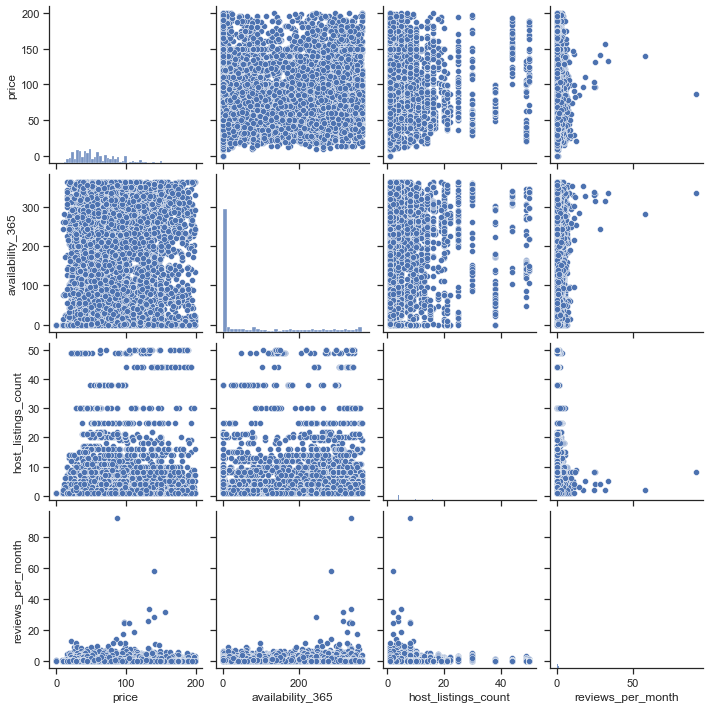

In [71]:
g = sns.pairplot(sub_2)

### Initial observations show that hosts with more listings generally have lower levels of reviews per month, whereas someone with fewer listings will generally have more reviews_per_month. Further, rentals with lower prices have more reviews_per_month, most likely as they are more affordable for the average customer. Overall, the level of availability is broadly the same relative to price, until it reaches an excess of 300+ per night, while availability_365 does not necessarily determine or impact the num_reviews_ltm. 

Based on these results, something that may be interesting to diagnose further is the top 10 hosts in terms of listings and whether they are renting mostly high price range apartments and in which location. 

In [72]:
# Checking to ensure host_id and top host are the same
top_10_host = df.host_id.value_counts().head(10)
top_10_host

8250486      49
378071271    38
8912086      38
210700814    31
335573202    30
386848467    30
108025548    28
1625771      25
23904144     22
39450649     21
Name: host_id, dtype: int64

In [73]:
top_host_check = df.host_listings_count.max()
top_host_check

50

In [74]:
## The above check confirms that the host_id of 335573202 has the most listings on the platform

In [75]:
## I will now run a scatterplot test to measure the level of correlation with the 
## 'host_listings_count' variable and 'price'

In [76]:
sub_3 = sub[['host_listings_count', 'price',]]

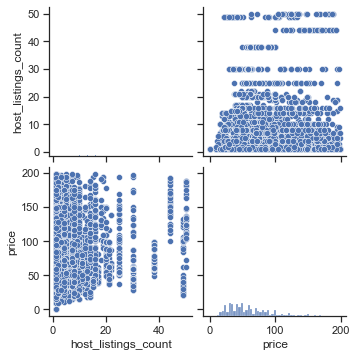

In [77]:
g = sns.pairplot(sub_3)

Based on the above, it appears that while some hosts with more than 40 listings do indeed have lists at the high end of the price range, several hosts seem to be within the mid-range for overnight rentals.

Moreover, based on the dataset available, it appears that I may have to consider other analyses or graphs, such as a bar/density chart to better understand the average price distribution in specific neighborhood_groups. In a further analysis or task, I may be better set up to create a geographical analysis of which areas are more expensive. Based on these current reuslts and correlation charts/analysis, I have first determined that many of the observations are fairly inconculsive so far.

# Categorical Plots

#### Creating a categorical variable for price into separate categories

<AxesSubplot:xlabel='price', ylabel='Count'>

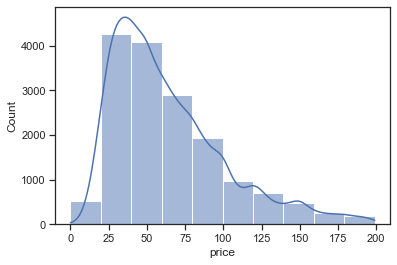

In [78]:
## Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['price'], bins = 10, kde = True)

Based on the above distribution, we can see that the higher price values (although having already removed all values above 200 EUR per night) are still skewing the dataframe somewhat. Ideally, a dataframe would have something closer to a bell curve. 


In [79]:
## Determining the quartile ranges of the 'price' variable 

df.price.quantile([0.25,0.5,0.75])

0.25    35.0
0.50    55.0
0.75    81.0
Name: price, dtype: float64

In [80]:
df.loc[df['price'] < 35, 'price_category'] = 'low_price'

In [81]:
df.loc[(df['price'] >= 35) & (df['price'] < 81), 'price_category'] = 'middle_price'

In [82]:
df.loc[df['price'] >= 81, 'price_category'] = 'high_price'

In [83]:
df['price_category'].value_counts(dropna = False)

middle_price    8658
high_price      4091
low_price       3516
Name: price_category, dtype: int64

In [84]:
df.columns

Index(['id', 'host_id', 'neighborhood_group', 'neighborhood', 'latitude',
       'longitude', 'room_type', 'price', 'minimum_nights',
       'number_of_reviews', 'reviews_per_month', 'host_listings_count',
       'availability_365', 'num_reviews_ltm', 'price_category'],
      dtype='object')

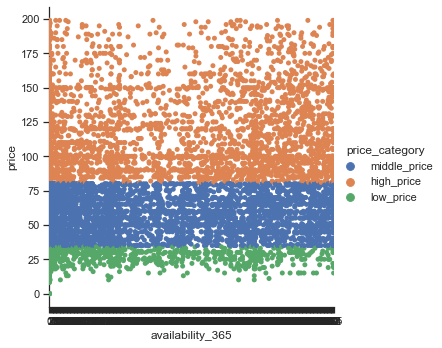

In [85]:
# Creating a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="availability_365", y="price", hue="price_category", data=df)

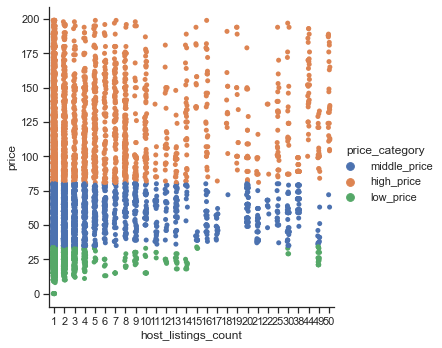

In [86]:
# Creating a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="host_listings_count", y="price", hue="price_category", data=df)

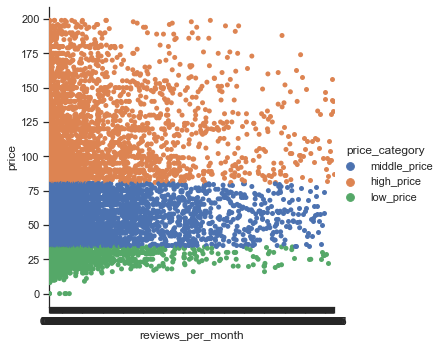

In [87]:
# Creating a categorical plot in seaborn using the price categories created above

sns.set(style="ticks")
g = sns.catplot(x="reviews_per_month", y="price", hue="price_category", data=df)

# 05 Questions

#### Which neighborhoods of Berlin have the highest availability and prices? Which areas are more affordable for overnight stays?

These questions will become more clear when we begin or undertake a geospatial analysis. 

#### Does a host with more listings tend to list apartments in more popular areas and/or at higher prices?

We would need to determine the top 10 hosts and then breakdown where they generally list their apartments and compare that to the average price of listings

## Hypotheses

1. If a host has more listings, the rental price will be higher. 
2. Alternatively, if a host has fewer listings, the rental prices will generally be lower. 
3. If a rental price is below average, they will have more reviews in the last 12 months. 

# 06. Exporting Data

In [89]:
# Exporting dataset as csv file

df.to_csv(os.path.join(path, "Data", 'Prepared Data', 'AirBnB Berlin_clean_2.csv'))